# Natural Language Processing(NLP)
* Broad topic that we can only touch on
* Typically involves ingesting text for analysis or modeling
* Commonly used NLP libraries
    * [NLTK](https://www.nltk.org/) -- partially installed with Anaconda
    * [Beautiful soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) -- html parser
    * [Wordcloud](https://pypi.org/project/wordcloud/)

In [18]:
from bs4 import BeautifulSoup as bs # no, the pun is not lost 
import requests
from wordcloud import WordCloud, STOPWORDS

In [19]:
url ="https://alphabench.com/data/python-loan-analysis.html"
data = requests.get(url).text

In [20]:
soup = bs(data,'html.parser')
soup

<!DOCTYPE html>

<html lang="en">
<!-- color: #A80B13; color: #5274AB;-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="python tutorial,python,numpy financial,loan analysis,python projects,python project ideas,python for finance,basic python for finance,python finance,python loan payment calculator,python automation,matt macarty,plotting mortgages in Python,amortization in Python,calculate monthly payment in Python,python app development,python class init method,python class for beginners,python automation project,plotting mortgages in python,python automation projects" name="keywords"/>
<meta content="Python project video tutorials: create a loan analysis application " name="description"/>
<meta content="Use Python to create a loan class - and application based on the class" property="og:title"/>
<meta content="https://alphabench.com/images/AlphaBenchLogo_bigger

In [21]:
# get the first paragraph, with and without tags
soup.p

<p>In the following video tutorials, we're going to be making a loan class to handle some of the common, repetitive tasks that are involved in loan analysis and then make an application based on the class. So when we're done, not only will you have a menu driven application, but you will also be able to import and use the class in your Python applications. <a href="https://github.com/mjmacarty/numpy_financial">You can download the code from Github</a>.</p>

In [22]:
# get the text of all hyperlinks
for link in soup.find_all('a'):
    print(link.text)


Follow @mjmacarty
Home
About
Programs
Contact
Publications
Resources
FAQ
You can download the code from Github
Skip down to the video tutorial
Get the notebooks here.


In [26]:
# get the URLs for all hyperlinks
for link in soup.find_all('a'):
    print(link.get('href'))

https://twitter.com/mjmacarty?ref_src=twsrc%5Etfw
../index.html
../about.html
../programs.html
../contact.html
../publications.html
../resources.html
../faq.html
https://github.com/mjmacarty/numpy_financial
#video
https://github.com/mjmacarty/numpy_financial


In [31]:
# get text in paragraphs
text = ""
for p in soup.find_all('p'):
    text += p.text

In [32]:
text

'In the following video tutorials, we\'re going to be making a loan class to handle some of the common, repetitive tasks that are involved in loan analysis and then make an application based on the class. So when we\'re done, not only will you have a menu driven application, but you will also be able to import and use the class in your Python applications. You can download the code from Github.Skip down to the video tutorialThe application will handle a number of common loan analysis tasks, very simply with minimal user inputs  the interest rate, the term and the amount of money we\'re borrowing. With just hose three inputs you can call payment, generate a summary and amortization table. You can always add functionality to your analyzer to make it better fit your needs.I have arbitrarily decided what a loan summary should look like, so if you don\'t like the summary I have come up with, you can add outputs to it as you see fit. Our class will also allow you see what happens if you pay 

In [51]:
# re - regular expression library
import re
def escape(text):
    pattern = re.compile(r'(\')')
    return pattern.sub('', text)

text = escape(text)
    

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r"\w+")
text = tokenizer.tokenize(text)

In [65]:
text = " ".join([word for word in text if word not in nltk.corpus.stopwords.words('english')])

In [66]:
text

'In following video tutorials going making loan class handle common repetitive tasks involved loan analysis make application based class So done menu driven application also able import use class Python applications You download code Github Skip video tutorialThe application handle number common loan analysis tasks simply minimal user inputs interest rate term amount money borrowing With hose three inputs call payment generate summary amortization table You always add functionality analyzer make better fit needs I arbitrarily decided loan summary look like dont like summary I come add outputs see fit Our class also allow see happens pay little bit extra every month For example add 100 every month able see much faster pay loan Or suppose want payoff loan nine 9 years able see much add month We start importing matplotlib pandas amortization table NumPy Financial time value money calculations NumPy Financial used part NumPy module may install Assuming working Anaconda installation already

In [71]:
from nltk import ngrams, FreqDist
freqs = dict()
for ngram in 1,2,3,4:
    freqs[ngram] = FreqDist(ngrams(text.split(), ngram))

In [73]:
freqs[1]

FreqDist({('loan',): 13, ('going',): 10, ('class',): 8, ('amortization',): 8, ('table',): 8, ('add',): 8, ('method',): 8, ('use',): 7, ('month',): 7, ('also',): 6, ...})

In [74]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(text)

{'neg': 0.022, 'neu': 0.81, 'pos': 0.169, 'compound': 0.9959}

### Word Cloud

In [79]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

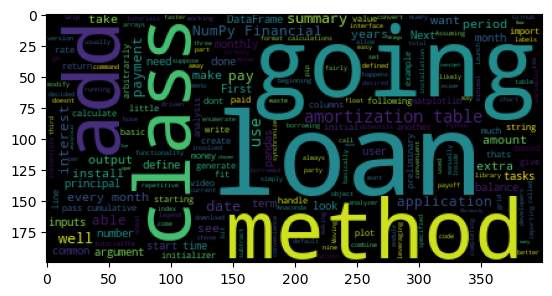

In [80]:
cloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(cloud)

In [3]:
!jt -t onedork -fs 12 -ofs 12 -nfs 12